# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
import numpy as np

In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings('ignore')

In [82]:
dt=pd.read_csv('testflight1.csv', )

In [83]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
df=pd.read_csv('flight1.csv')

In [6]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
df = pd.read_csv("flight1.csv", parse_dates=['Date_of_Journey'])

# df is our train data , we will first analysis Train data seems 

First we will convert  datetime column to proper format 

In [8]:
df['Date_of_Journey'].dtypes

dtype('<M8[ns]')

In [9]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [10]:
df['Date_of_Journey'].dtypes

dtype('<M8[ns]')

In [11]:
df['year'] = df['Date_of_Journey'].dt.year

df['month'] = df['Date_of_Journey'].dt.month

df['day'] = df['Date_of_Journey'].dt.day

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3


In [13]:
df.drop(('Date_of_Journey'),axis=1,inplace=True)

We have droopred  'Date_of_Journey' itseems

In [14]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  year             10683 non-null  int64 
 11  month            10683 non-null  int64 
 12  day              10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


O-we found there is no null value 

In [16]:
df.describe()

,Price,year,month,day
count,10683.000000,10683.0,10683.000000,10683.000000
mean,9087.064121,2019.0,5.534775,12.682205
std,4611.359167,0.0,2.987489,8.803701
min,1759.000000,2019.0,1.000000,3.000000
25%,5277.000000,2019.0,3.000000,5.000000
50%,8372.000000,2019.0,5.000000,6.000000
75%,12373.000000,2019.0,6.000000,21.000000
max,79512.000000,2019.0,12.000000,27.000000


observation--we found mean and 50% median having difference which indicates outlier might present . all the columns having same count

In [17]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'year', 'month',
       'day'],
      dtype='object')

observation -Above are the column details which are present in df data frame

In [18]:

        
d=df.columns
for i in d:
    if df[i].dtypes!='object':
        print(df[i].head(0))
        

Series([], Name: Price, dtype: int64)
Series([], Name: year, dtype: int64)
Series([], Name: month, dtype: int64)
Series([], Name: day, dtype: int64)


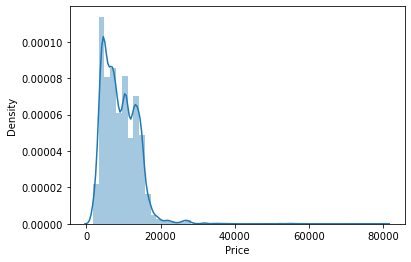

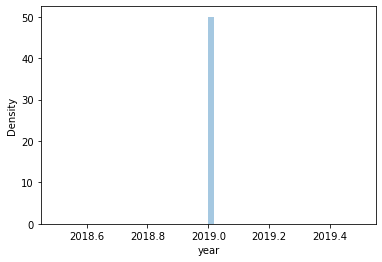

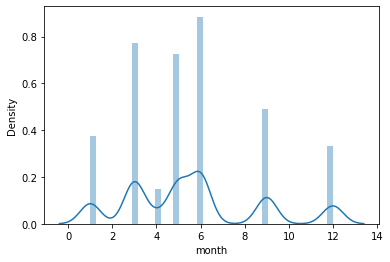

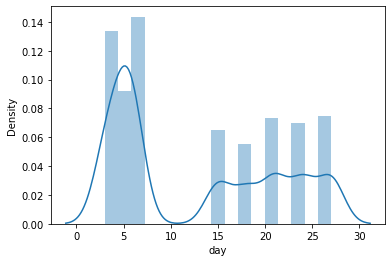

In [24]:
d=df.columns
for i in d:
    if df[i].dtypes!='object':
        sns.distplot(df[i])
        plt.show()

 Price---Data is  not  normally distributed
 year---------Data is  not  normally distributed
 month----------Data is  not  normally distributed
 day-------------Data is  not  normally distributed

In [25]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(df[i].head(0))

Series([], Name: Airline, dtype: object)
Series([], Name: Source, dtype: object)
Series([], Name: Destination, dtype: object)
Series([], Name: Route, dtype: object)
Series([], Name: Dep_Time, dtype: object)
Series([], Name: Arrival_Time, dtype: object)
Series([], Name: Duration, dtype: object)
Series([], Name: Total_Stops, dtype: object)
Series([], Name: Additional_Info, dtype: object)


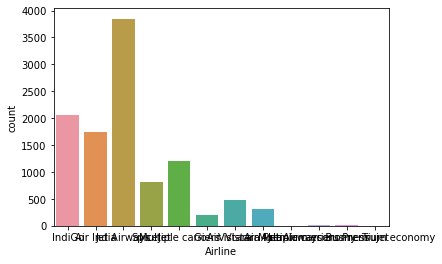

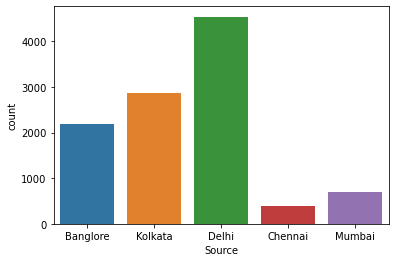

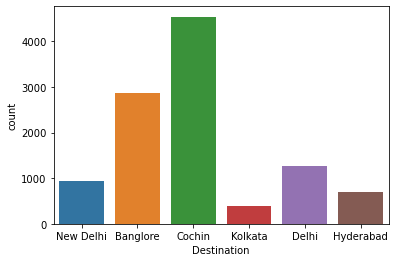

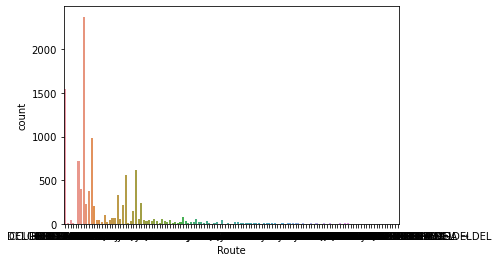

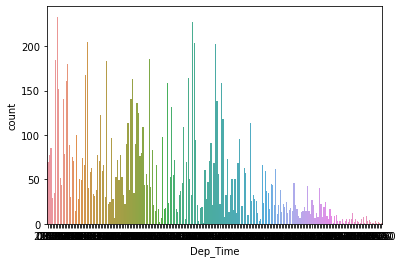

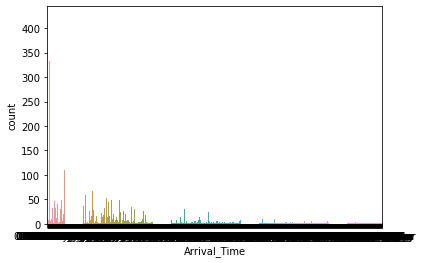

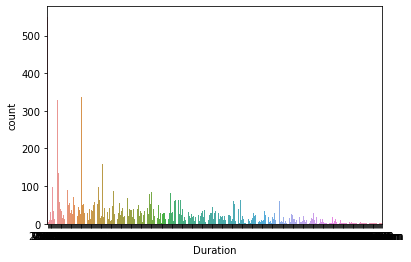

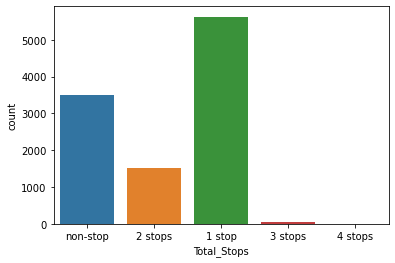

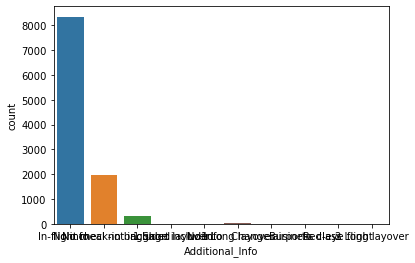

In [26]:
for i in d:
    if df[i].dtypes=='object':
        sns.countplot(df[i])
        plt.show()

Observation--Airline-- this column is having clss imbalance issue,column is categorial

Source--  Delhi is the highest output of this column, this column is also having class imbalance issue

Destination---cochin has the highest output of this column , this column is also having class imbalance issue

Route--this column is also having class imbalance issue

dep_time-- This column is categorical column , frequency of data is not equally distributed

Arrival_Time- This columns is also having class having class imbalance issue, column is categorial , frequency of data is not equally distributed


Duration--This columns is also having class having class imbalance issue, column is categorial , frequency of data is not equally distributed

Total_Stops-This columns is also having class having class imbalance issue, column is categorial , frequency of data is not equally distributed

Additional_Info-This columns is also having class having class imbalance issue, column is categorial , frequency of data is not equally distributed

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d=df.columns
for i in d:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])


In [20]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,3,0,5,18,211,233,240,4,8,3897,2019,3,24
1,1,3,0,84,31,906,336,1,8,7662,2019,1,5
2,4,2,1,118,70,413,106,1,8,13882,2019,9,6
3,3,3,0,91,164,1324,311,0,8,6218,2019,12,5
4,3,0,5,29,149,1237,303,0,8,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,236,4,8,4107,2019,9,4
10679,1,3,0,64,193,1305,237,4,8,4145,2019,4,27
10680,4,0,2,18,58,824,280,4,8,7229,2019,4,27
10681,10,0,5,18,92,938,238,4,8,12648,2019,1,3


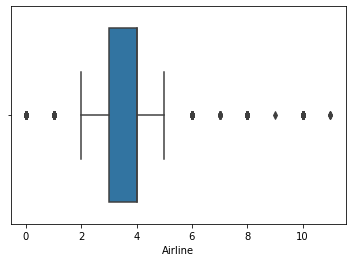

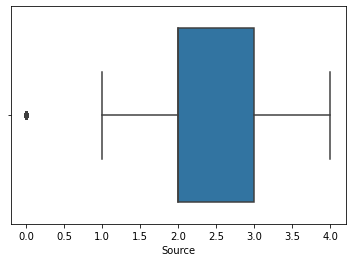

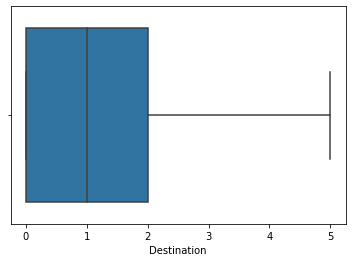

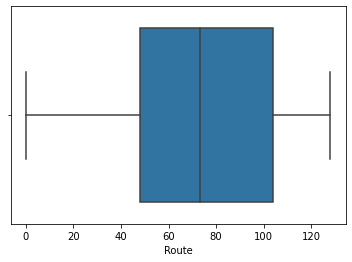

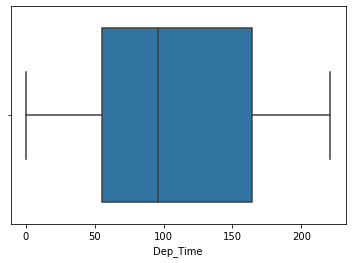

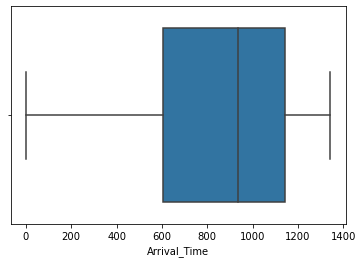

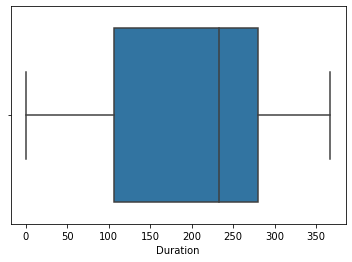

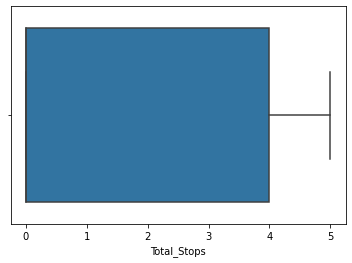

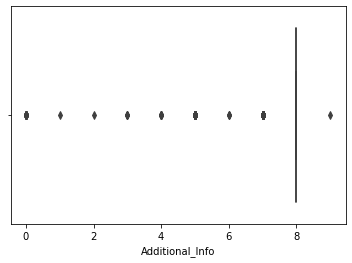

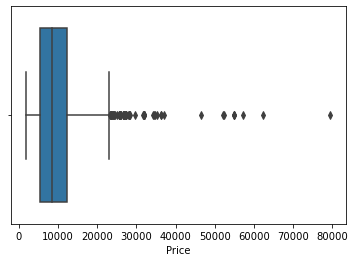

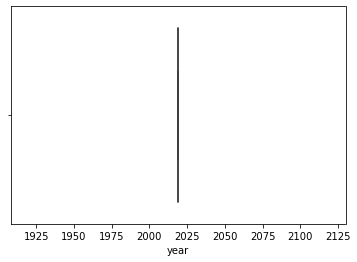

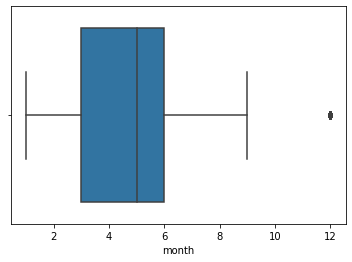

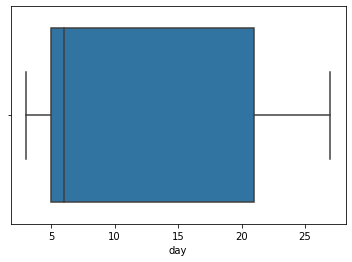

In [21]:
d=df.columns
for i in d:
 sns.boxplot(df[i])
 plt.show()

Airline, source, Additional_info,month having outlier from the plot we can say it but as all columns are categorial so we will not remove outlier , month also we calculated from date time if we remove outlier we might loss some information

In [30]:
df.isnull().any()

Airline            False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
year               False
month              False
day                False
dtype: bool

O--we found no null values

Bi-variate ANALYSIS

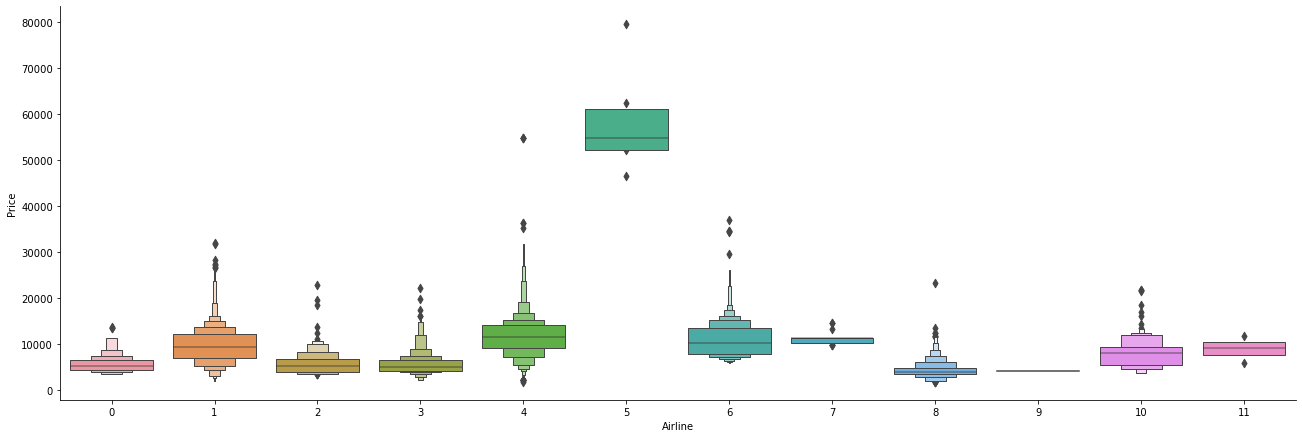

In [31]:
sns.catplot(y = "Price", x = "Airline", data = df, kind="boxen", height = 6, aspect = 3)
plt.show()


In [30]:
dfcor=df.corr()

In [31]:
dfcor

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
Airline,1.000000,-0.013401,0.018479,0.025039,-0.039439,-0.015733,0.027917,0.035732,-0.060802,-0.039520,NaN,-0.007918,0.031218
Source,-0.013401,1.000000,-0.592574,0.403378,0.055191,0.020844,-0.192009,-0.225557,-0.022107,0.015998,NaN,0.063052,0.007560
Destination,0.018479,-0.592574,1.000000,-0.461169,-0.063608,-0.036830,0.022037,0.337756,0.026806,-0.071112,NaN,-0.105039,-0.052076
Route,0.025039,0.403378,-0.461169,1.000000,-0.082080,0.010523,-0.062111,-0.437362,0.035216,0.164085,NaN,0.042211,0.096470
Dep_Time,-0.039439,0.055191,-0.063608,-0.082080,1.000000,-0.023294,0.041619,0.044536,-0.052853,0.002949,NaN,0.027747,-0.003399
Arrival_Time,-0.015733,0.020844,-0.036830,0.010523,-0.023294,1.000000,0.027746,-0.097269,0.017505,0.027377,NaN,-0.002303,0.001485
Duration,0.027917,-0.192009,0.022037,-0.062111,0.041619,0.027746,1.000000,0.175106,0.080151,-0.144270,NaN,-0.038864,0.024767
Total_Stops,0.035732,-0.225557,0.337756,-0.437362,0.044536,-0.097269,0.175106,1.000000,0.164114,-0.571179,NaN,-0.056475,0.043674
Additional_Info,-0.060802,-0.022107,0.026806,0.035216,-0.052853,0.017505,0.080151,0.164114,1.000000,-0.065478,NaN,-0.009098,-0.019456
Price,-0.039520,0.015998,-0.071112,0.164085,0.002949,0.027377,-0.144270,-0.571179,-0.065478,1.000000,NaN,0.010700,-0.165412


In [25]:
df.drop(('year'), axis=1, inplace=True )

In [26]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,3,0,5,18,211,233,240,4,8,3897,3,24
1,1,3,0,84,31,906,336,1,8,7662,1,5
2,4,2,1,118,70,413,106,1,8,13882,9,6
3,3,3,0,91,164,1324,311,0,8,6218,12,5
4,3,0,5,29,149,1237,303,0,8,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,236,4,8,4107,9,4
10679,1,3,0,64,193,1305,237,4,8,4145,4,27
10680,4,0,2,18,58,824,280,4,8,7229,4,27
10681,10,0,5,18,92,938,238,4,8,12648,1,3


In [27]:
dfcor['Price'].sort_values(ascending=False)

Price              1.000000
Route              0.164085
Arrival_Time       0.027377
Source             0.015998
month              0.010700
Dep_Time           0.002949
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
day               -0.165412
Total_Stops       -0.571179
year                    NaN
Name: Price, dtype: float64

<AxesSubplot:xlabel='Route', ylabel='Price'>

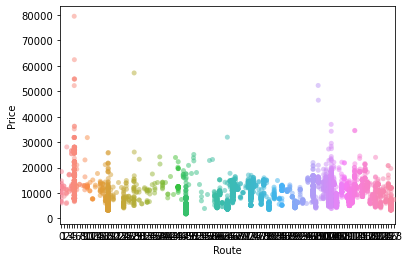

In [88]:
sns.stripplot(  x='Route', y='Price' ,alpha=0.5 ,c=(0,0,1) , data=df)

 Observation - we plotted stripplot  one  categorial  column respect to price they are not highly correlated  but both are having positive correlationship

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

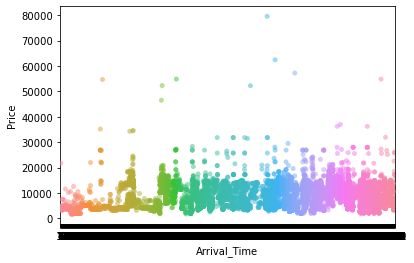

In [22]:
sns.stripplot(  x='Arrival_Time', y='Price' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  one  categorial  column respect to price they are not highly correlated  but both are having positive correlationship

<AxesSubplot:xlabel='Source', ylabel='Price'>

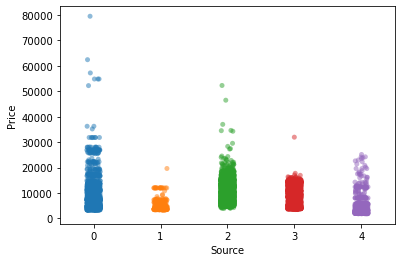

In [23]:
sns.stripplot(  x='Source', y='Price' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  one  categorial  column respect to price they are not highly correlated  but both are having positive correlationship

<AxesSubplot:xlabel='month', ylabel='Price'>

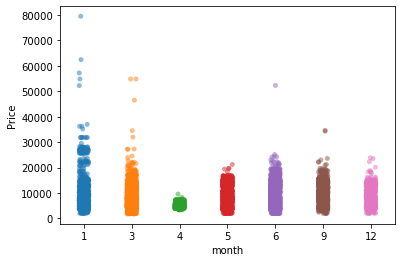

In [24]:
sns.stripplot(  x='month', y='Price' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  one  categorial  column respect to price they are not highly correlated  but both are having positive correlationship

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Airline', ylabel='day'>

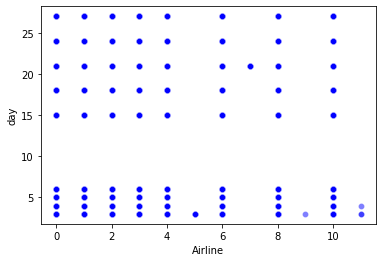

In [25]:
sns.scatterplot(  x='Airline', y='day' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted   column respect to price they are not highly correlated  but both are having positive correlationship

# negative correalationship

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Duration', ylabel='Price'>

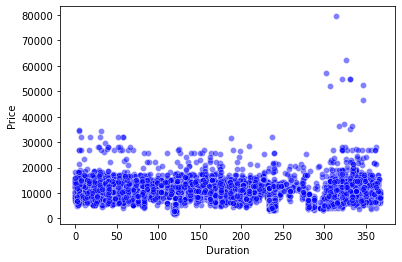

In [26]:
sns.scatterplot(x='Duration', y='Price' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted scatterplot  of  column Duration respect to price they are not highly correlated  but both are having negative correlationship

<AxesSubplot:xlabel='day', ylabel='Price'>

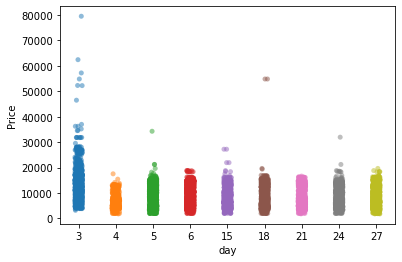

In [27]:
sns.stripplot(x='day', y='Price' ,alpha=0.5 ,c=(0,0,1) , data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

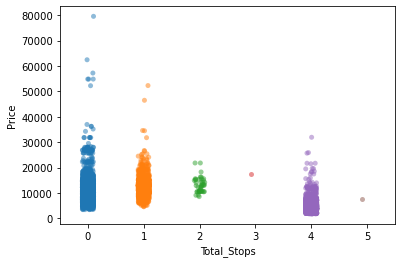

In [28]:
sns.stripplot(x='Total_Stops', y='Price' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  one  categorial  column respect to price they are not highly correlated  but both are havingnegative correlationship

Multivarite analysis

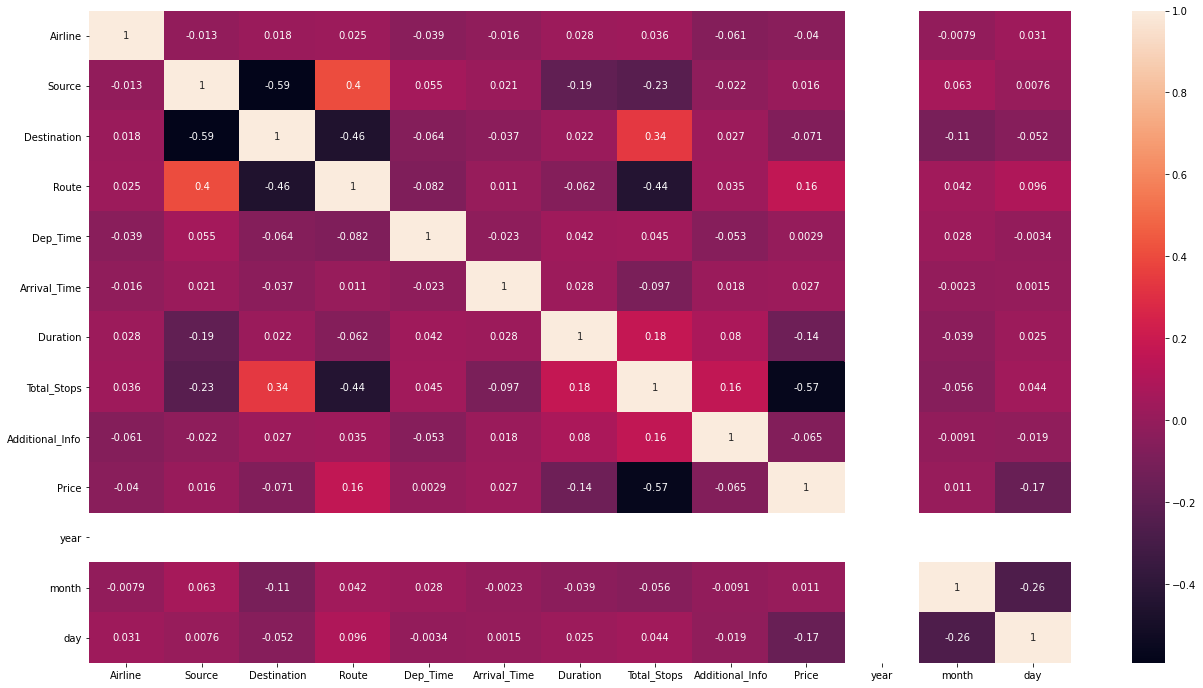

In [32]:
plt.figure(figsize = (22,12))
sns.heatmap(dfcor, annot=True)

plt.show()

O--->we checked the colour where it is lighter corresponding to that point we will get value of x and y . x nd y are two different column and that poing having non linearity and where value is near to 1 and colur is darker we found high correlation 

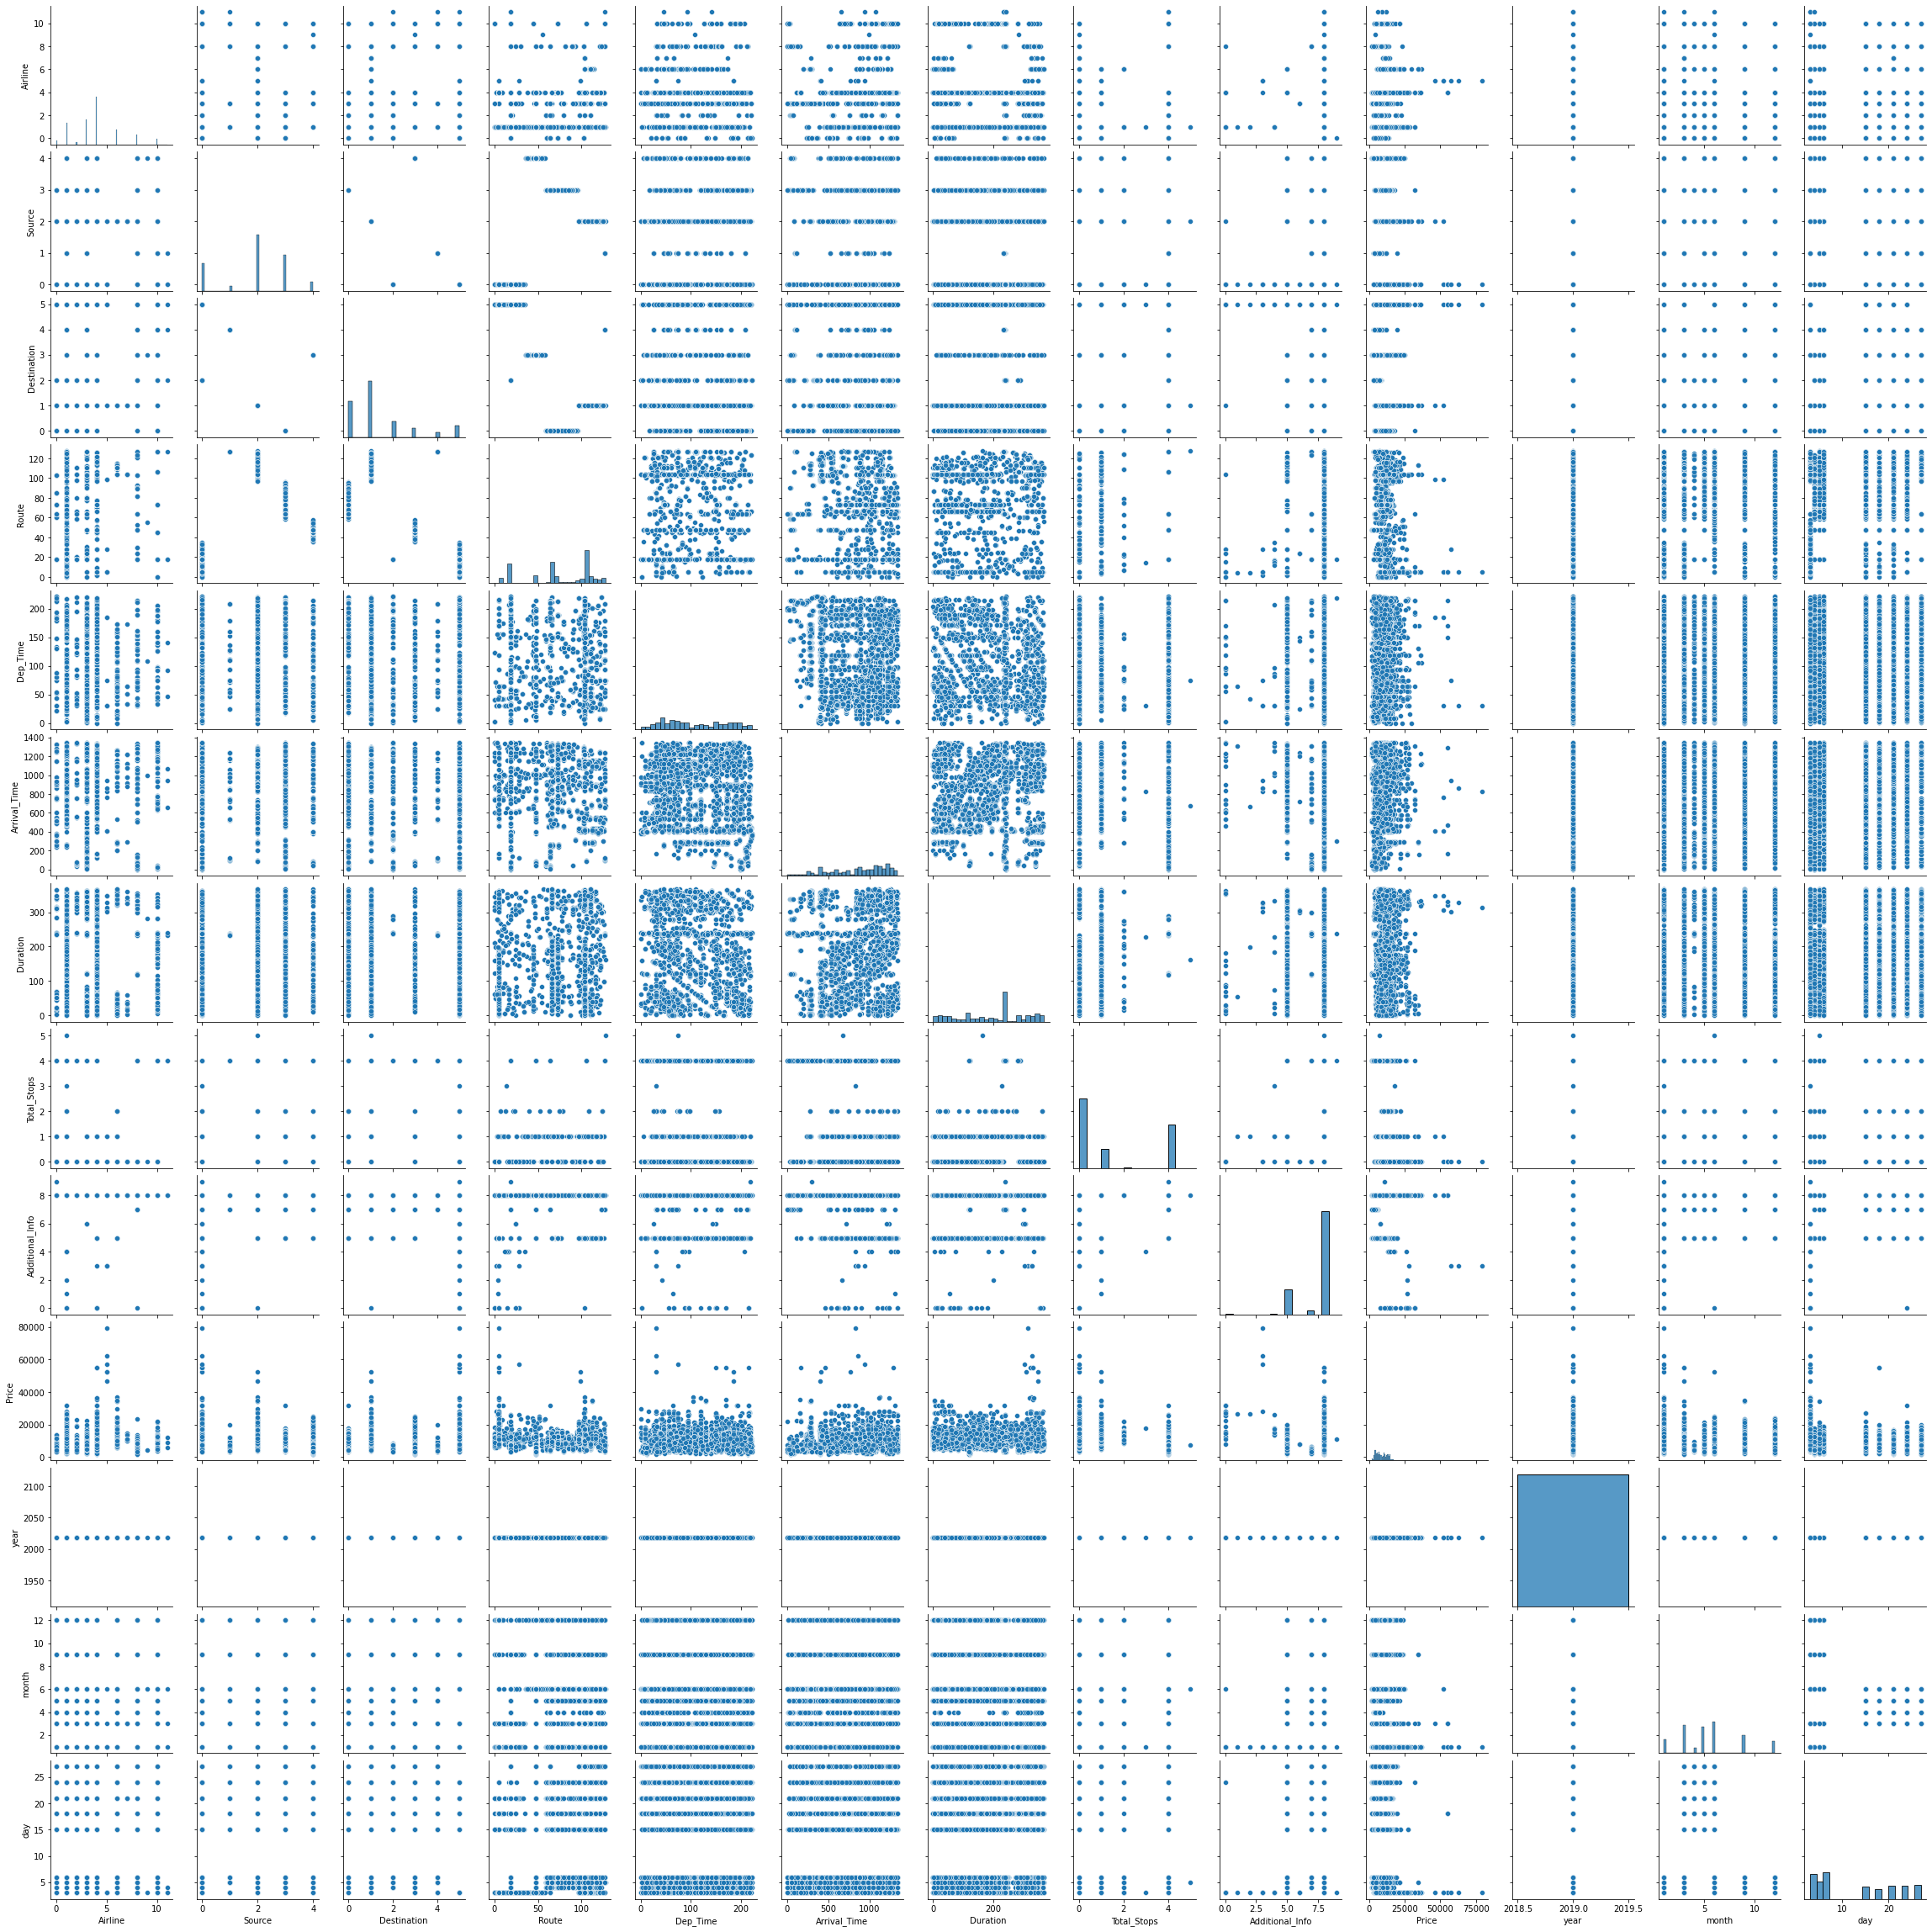

In [33]:
sns.pairplot(df)

O-->for graphical view of multivatiate  analysis we plotted pairplot ,l we seen the data distributiin

In [34]:
y=df['Price']

In [35]:
y.ndim

1

In [36]:
y=y.values.reshape(-1,1)

In [37]:
x=df.drop(('Price'),axis=1)

In [38]:
x.ndim

2

In [39]:
x

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,3,0,5,18,211,233,240,4,8,2019,3,24
1,1,3,0,84,31,906,336,1,8,2019,1,5
2,4,2,1,118,70,413,106,1,8,2019,9,6
3,3,3,0,91,164,1324,311,0,8,2019,12,5
4,3,0,5,29,149,1237,303,0,8,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,236,4,8,2019,9,4
10679,1,3,0,64,193,1305,237,4,8,2019,4,27
10680,4,0,2,18,58,824,280,4,8,2019,4,27
10681,10,0,5,18,92,938,238,4,8,2019,1,3


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)

In [41]:
import  statistics as  st

from sklearn.model_selection import train_test_split
from  sklearn.linear_model  import LinearRegression
from sklearn.metrics  import    mean_squared_error ,r2_score
from sklearn.tree  import DecisionTreeRegressor

from  sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from  sklearn.neighbors  import KNeighborsRegressor


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.22  , random_state=42)

In [43]:
lg=LinearRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.37081197551350364

In [44]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtc=dtr.predict(x_test)
print("mse==",mean_squared_error(y_test,preddtc))
print("R2SCORE" ,r2_score(y_test,preddtc))

mse== 3324662.033815398
R2SCORE 0.8416427652304719


In [45]:
rvr=RandomForestRegressor()
rvr.fit(x_train,y_train)
predrvr=rvr.predict(x_test)
print("mse==",mean_squared_error(y_test,predrvr))
print("R2SCORE" ,r2_score(y_test,predrvr))

mse== 2141358.45900171
R2SCORE 0.8980047894285674


In [46]:
from xgboost  import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
preddtc=xg.predict(x_test)
print("mse==",mean_squared_error(y_test,preddtc))
print("R2SCORE" ,r2_score(y_test,preddtc))

mse== 2245393.882689667
R2SCORE 0.8930494701071642


In [47]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predrvr=ad.predict(x_test)
print("mse==",mean_squared_error(y_test,predrvr))
print("R2SCORE" ,r2_score(y_test,predrvr))

mse== 16422557.13649891
R2SCORE 0.21777590939189329


In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
print(cross_val_score(xg,x,y,cv=5).mean())

0.8958667123594382


In [50]:
print(cross_val_score(rvr,x,y,cv=5).mean())

0.8871813032754947


In [51]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.11478818494272017


In [52]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.8259325722399604


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameter= {'n_estimators':[2,4,6,8],
           'criterion':['mse', 'mae']  , 'max_depth':np.arange(2,20)}

In [58]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'n_estimators': [2, 4, 6, 8]})

In [60]:
GCV.best_params_

{'criterion': 'mae', 'max_depth': 17, 'n_estimators': 8}

In [55]:
Finalmodel=RandomForestRegressor(n_estimators=8, max_depth=17,min_samples_split=2, random_state=0,criterion='mae')
Finalmodel.fit(x_train, y_train)

scores = cross_val_score(Finalmodel, x, y, cv=5)
R2score=scores.mean()

print(R2score*100)

87.16484768593311


In [58]:
import joblib
joblib.dump(Finalmodel,"Finaloutputofprice---oftraindata.pkl")

['Finaloutputofprice---oftraindata.pkl']

# Test Data ANALYSIS:

In [59]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [84]:
dt=pd.read_csv('testflight1.csv', parse_dates=['Date_of_Journey'])

In [85]:
dt['Date_of_Journey'].dtypes

dtype('<M8[ns]')

In [86]:
dt['Date_of_Journey']=pd.to_datetime(dt['Date_of_Journey'])

In [87]:
dt['year'] = dt['Date_of_Journey'].dt.year

dt['month'] = dt['Date_of_Journey'].dt.month

dt['day'] = dt['Date_of_Journey'].dt.day

In [88]:
dt.drop(('Date_of_Journey'),axis=1,inplace=True)

We have droopred  'Date_of_Journey' itseems

In [89]:
dt

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,2019,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,2019,3,27
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,2019,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,2019,6,3


Test dataframe which is having 2671 rows and 12 columns

In [90]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Duration         2671 non-null   object
 7   Total_Stops      2671 non-null   object
 8   Additional_Info  2671 non-null   object
 9   year             2671 non-null   int64 
 10  month            2671 non-null   int64 
 11  day              2671 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 250.5+ KB


O-we found there is no null value 

In [91]:
dt.describe()

,year,month,day
count,2671.0,2671.000000,2671.000000
mean,2019.0,5.607263,12.026956
std,0.0,3.042952,8.564408
min,2019.0,1.000000,3.000000
25%,2019.0,3.000000,5.000000
50%,2019.0,5.000000,6.000000
75%,2019.0,6.000000,21.000000
max,2019.0,12.000000,27.000000


observation-- all the columns having same count

In [92]:
dt.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'year', 'month', 'day'],
      dtype='object')

O-->we  the columns which dt is holding

In [93]:
d=dt.columns
for i in d:
    if dt[i].dtypes!='object':
        print(dt[i].head(0))

Series([], Name: year, dtype: int64)
Series([], Name: month, dtype: int64)
Series([], Name: day, dtype: int64)


O--we have derived it frrom  Date_of_Journey

In [94]:
d=dt.columns
for i in d:
    if dt[i].dtypes=='object':
        print(dt[i].head(0))

Series([], Name: Airline, dtype: object)
Series([], Name: Source, dtype: object)
Series([], Name: Destination, dtype: object)
Series([], Name: Route, dtype: object)
Series([], Name: Dep_Time, dtype: object)
Series([], Name: Arrival_Time, dtype: object)
Series([], Name: Duration, dtype: object)
Series([], Name: Total_Stops, dtype: object)
Series([], Name: Additional_Info, dtype: object)


# Converting categorial data to numeric

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d=dt.columns
for i in d:
    if dt[i].dtypes=="object":
        dt[i]=le.fit_transform(dt[i])


In [96]:
dt

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,4,2,1,76,138,150,10,0,5,2019,6,6
1,3,3,0,65,31,353,248,0,5,2019,12,5
2,4,2,1,76,156,566,148,0,3,2019,5,21
3,6,2,1,76,48,633,36,0,5,2019,5,21
4,0,0,2,16,198,135,216,4,5,2019,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,170,617,150,0,5,2019,6,6
2667,3,3,0,43,106,507,213,4,5,2019,3,27
2668,4,2,1,76,183,151,278,0,5,2019,6,3
2669,1,2,1,76,11,577,60,0,5,2019,6,3


univariate Analysis:

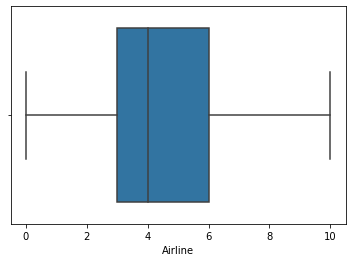

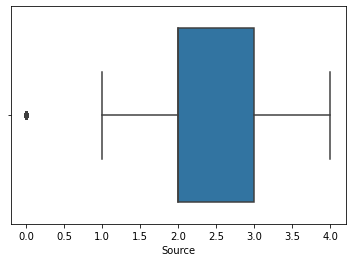

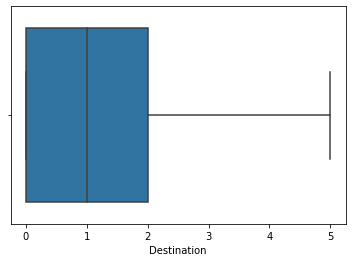

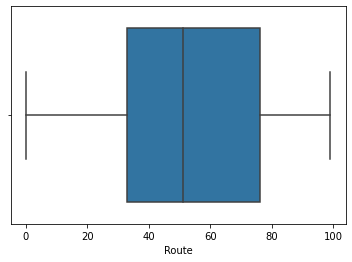

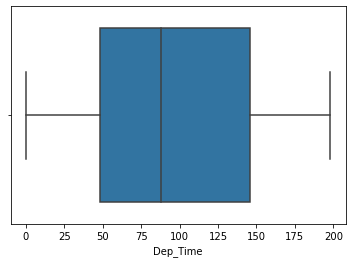

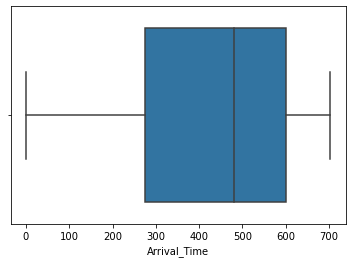

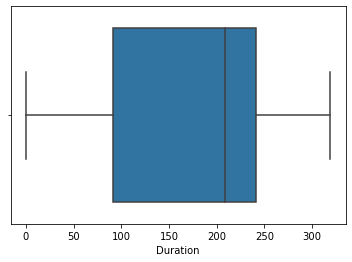

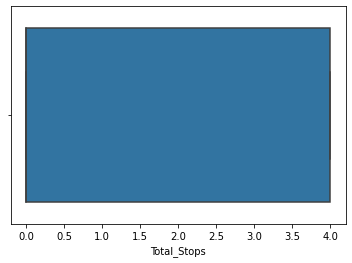

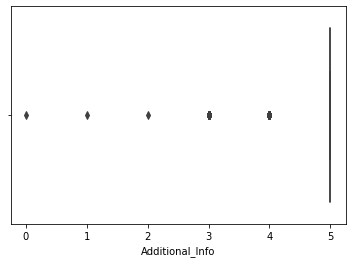

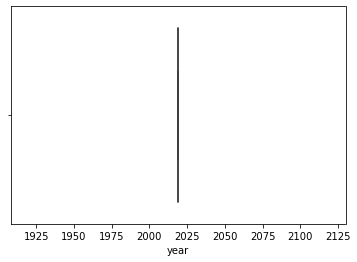

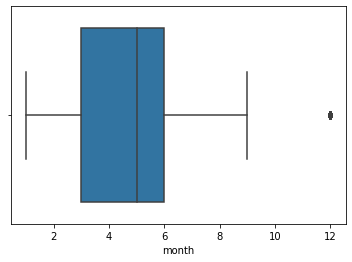

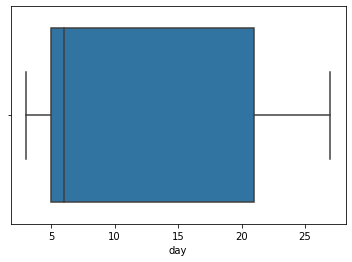

In [76]:
d=dt.columns
for i in d:
 sns.boxplot(dt[i])
 plt.show()
        

O-->only source and additional info having outlier but as those are categorial column so no need to remove outlier''

# Bi variate Analysis:

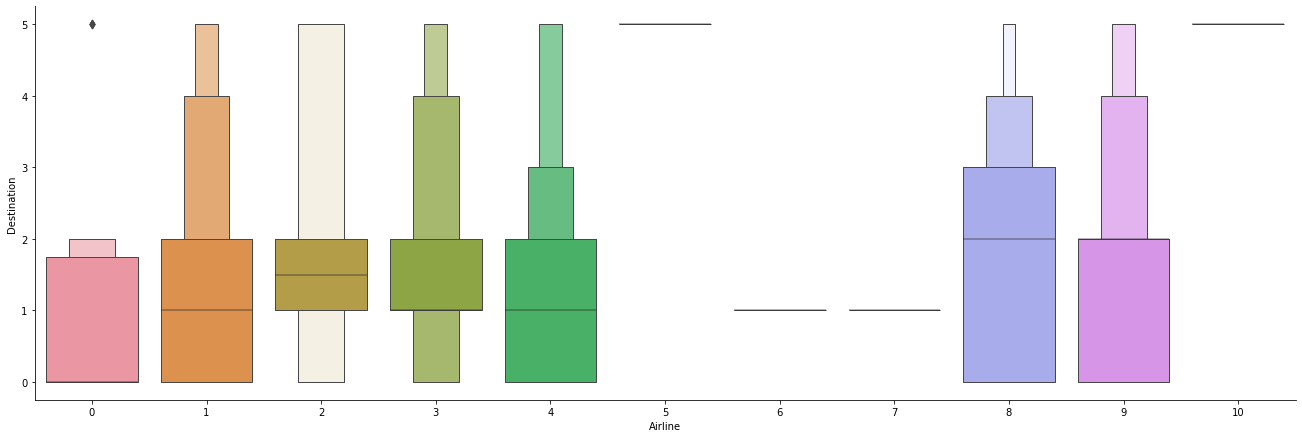

In [77]:
sns.catplot(y = "Destination", x = "Airline", data = dt, kind="boxen", height = 6, aspect = 3)
plt.show()


O-->we plotted Destination vs Airline frequency of data distrubution

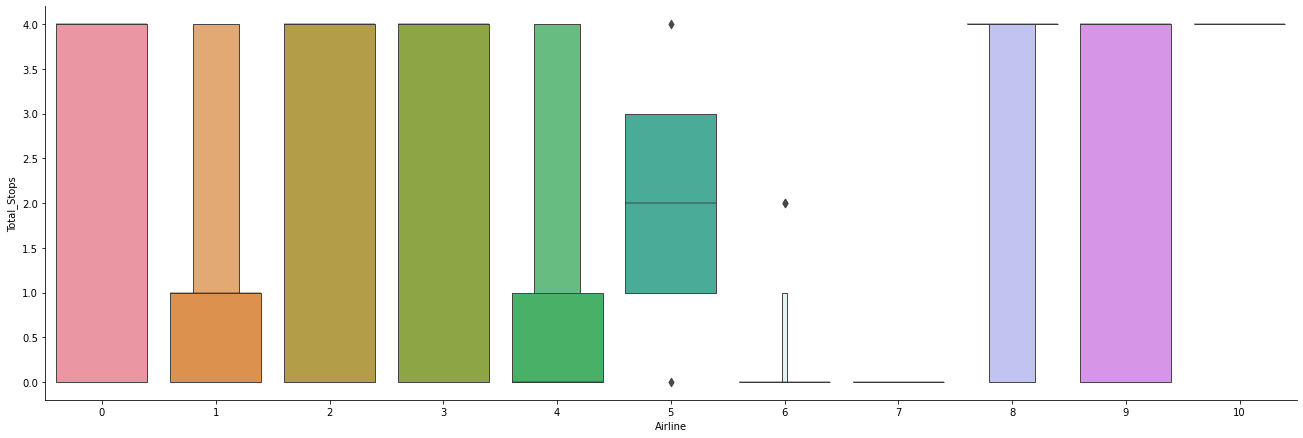

In [78]:
sns.catplot(y = "Total_Stops", x = "Airline", data = dt, kind="boxen", height = 6, aspect = 3)
plt.show()


O-->we plotted Total_Stops vs Airline frequency of data distrubution

Multivariate Analysis:

In [72]:
dtcor=dt.corr()

<AxesSubplot:>

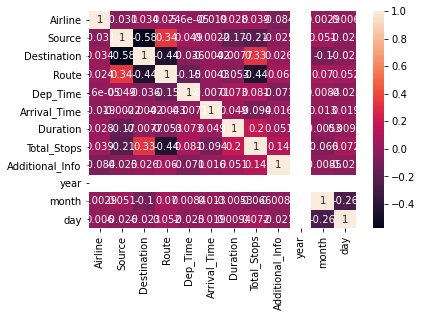

In [76]:
sns.heatmap(dtcor,annot=True)

In [97]:
dt

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,4,2,1,76,138,150,10,0,5,2019,6,6
1,3,3,0,65,31,353,248,0,5,2019,12,5
2,4,2,1,76,156,566,148,0,3,2019,5,21
3,6,2,1,76,48,633,36,0,5,2019,5,21
4,0,0,2,16,198,135,216,4,5,2019,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,170,617,150,0,5,2019,6,6
2667,3,3,0,43,106,507,213,4,5,2019,3,27
2668,4,2,1,76,183,151,278,0,5,2019,6,3
2669,1,2,1,76,11,577,60,0,5,2019,6,3


we are dropping year because it is  holding unique value through out the column , it wount provide much information  to predict  the outcome

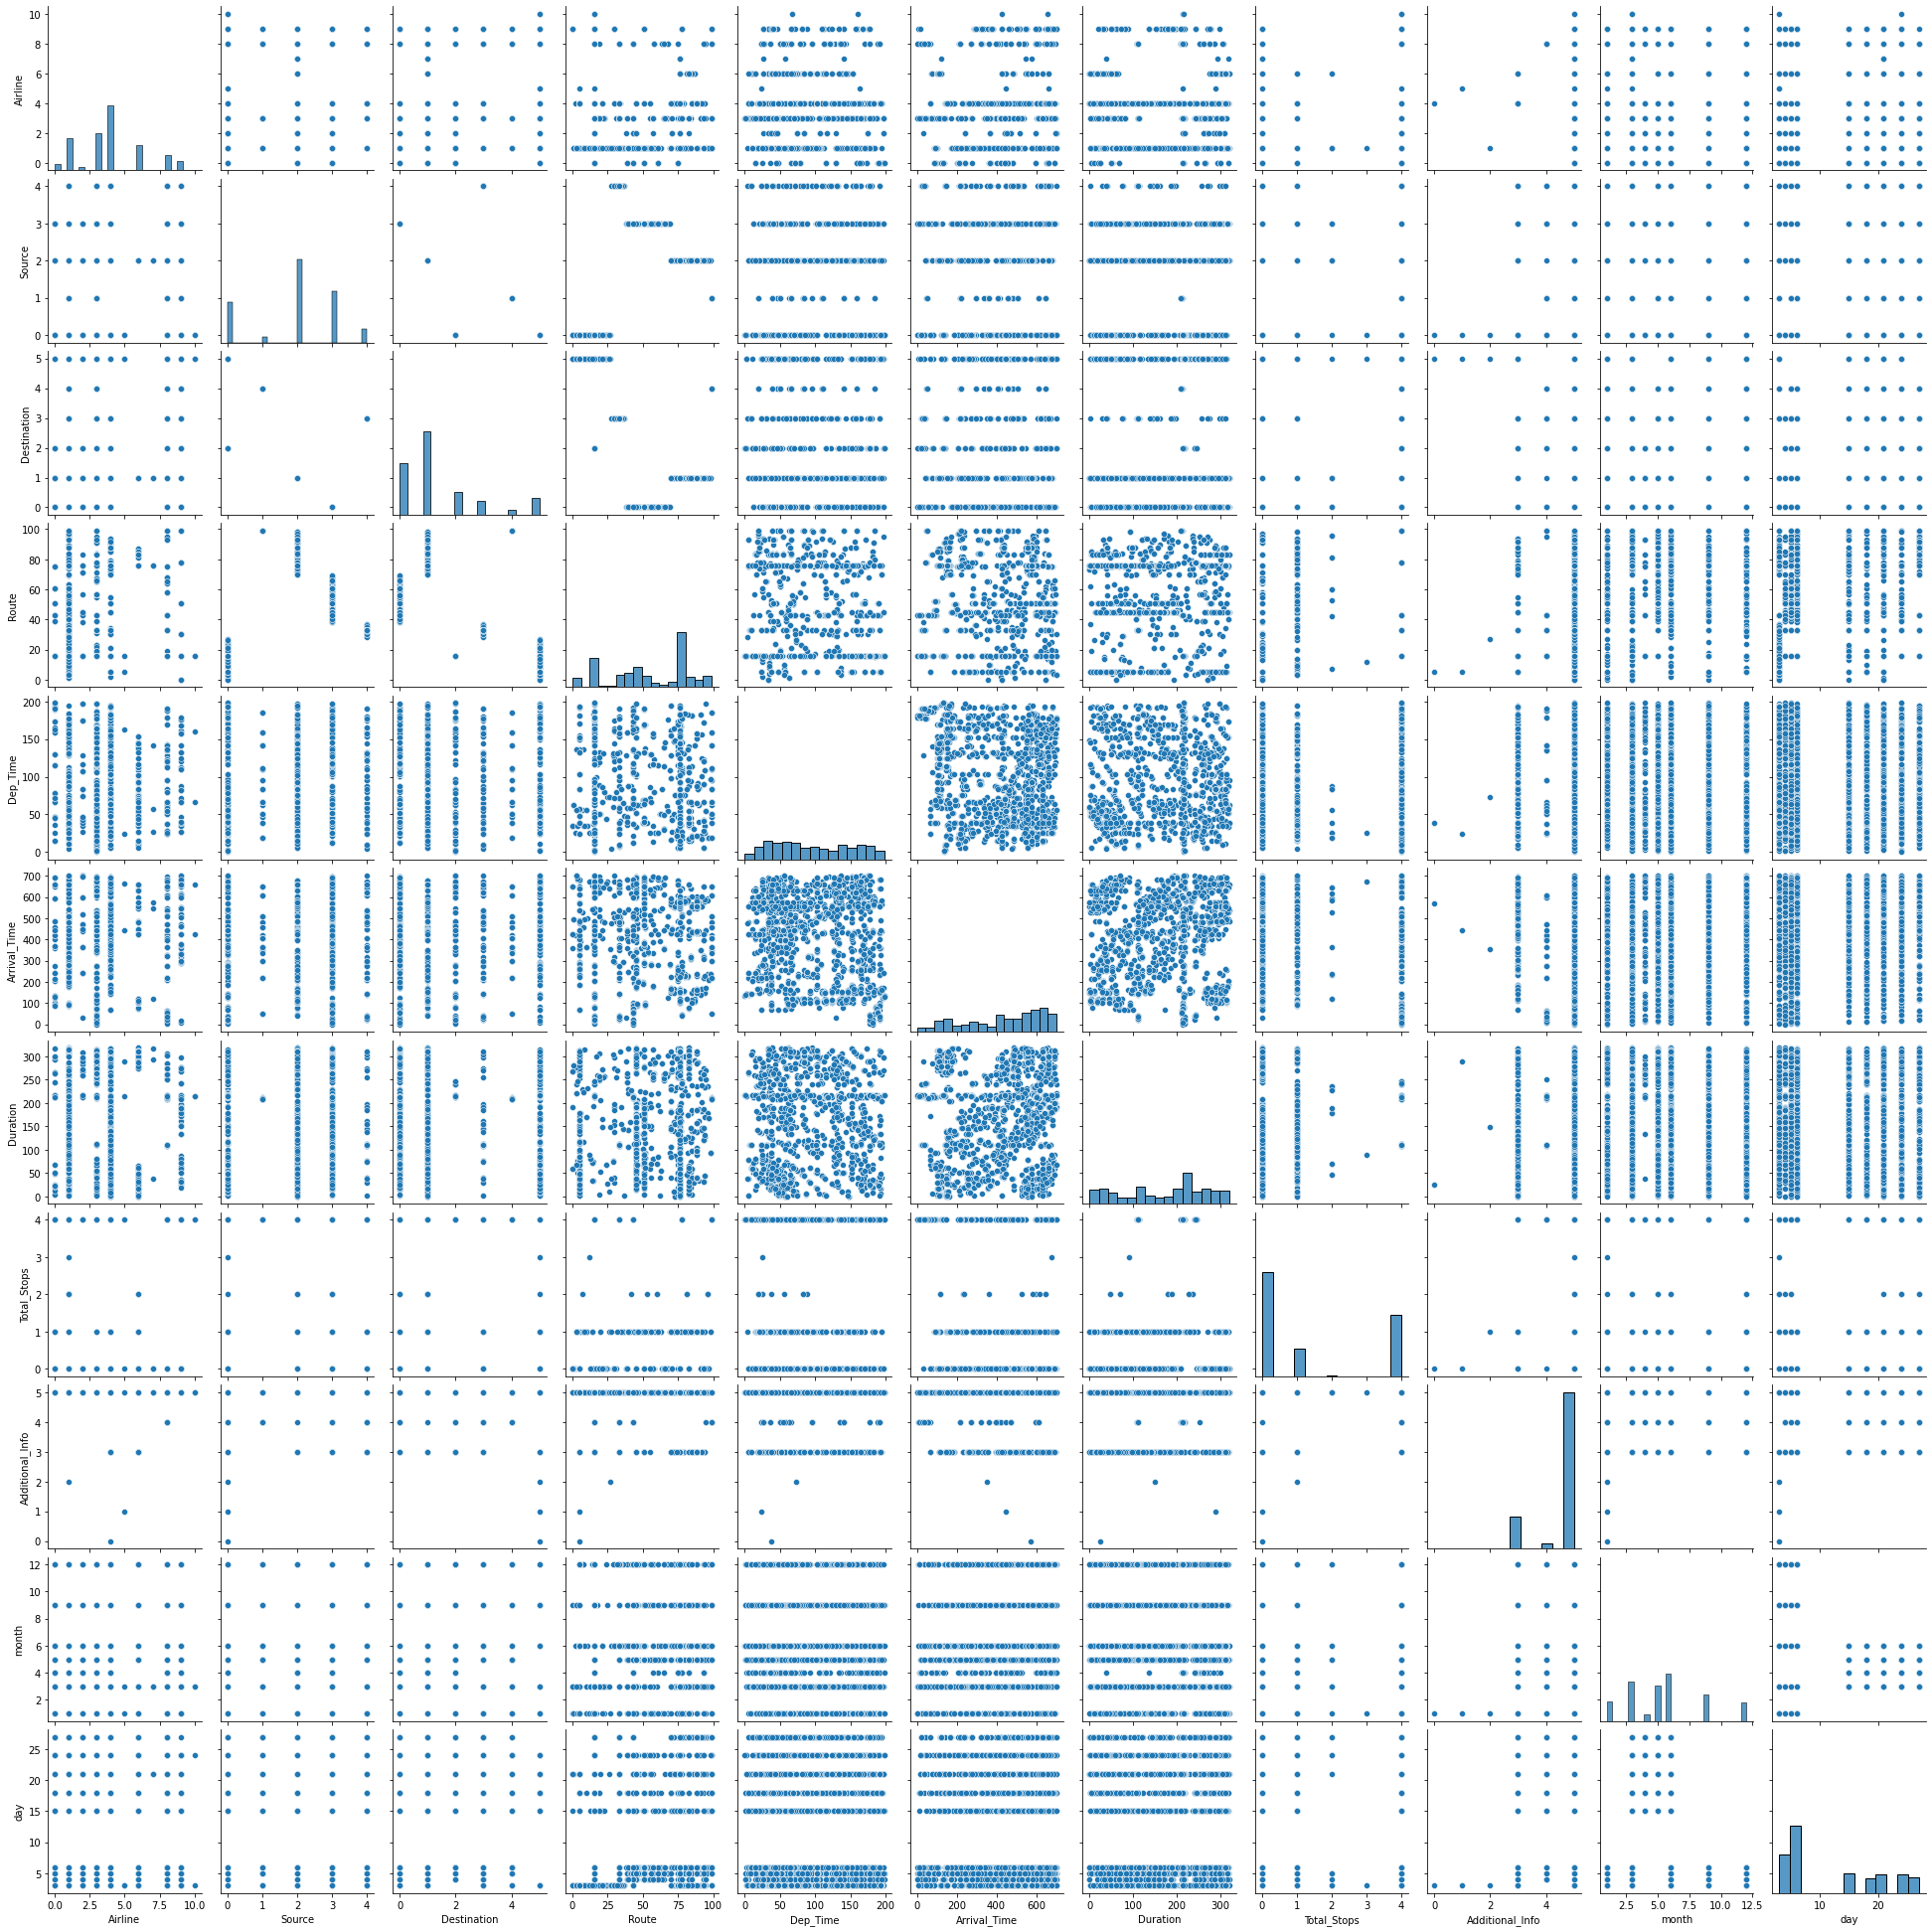

In [75]:
sns.pairplot(dt)

for graphical view of multivatiate  analysis we plotted pairplot ,l we seen the data distribution

# Data scaling for final output 

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dt_sc = sc.fit_transform(dt)

In [100]:
pred=Finalmodel.predict(dt)

In [101]:
pred

array([10597.875,  4588.25 , 12384.125, ..., 14458.875, 14067.5  ,
        9191.5  ])

In [102]:
import joblib
joblib.dump(pred,"Finaloutputofprice.pkl")

['Finaloutputofprice.pkl']